In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sp
import scipy.stats as st
import datetime
import os as os


In [2]:
#Extra Headers:
#import pandas as pd
import random
import multiprocessing
from joblib import Parallel, delayed
import time
import math
import platform

In [3]:
PlotWidthIn = 11
PlotHeightIn = 3.75
PlotDPI = 120

In [4]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

In [5]:
if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'
    

if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/data10/dchendrickson01/SmallCopy/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'SmallCopy/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'SmallCopy\\'

In [6]:
import CoreFunctions as cf

In [7]:
if Computer == "SciClone":
    file = '60kPoints-220111-1554-s2.csv'
elif Computer == "WinLap":
    file = 'fail'
elif Computer == "Desktop":
    file = '60kPoints-220208-1138-s3.csv'
elif Computer == "LinLap":
    file = 'fail'
elif Computer == 'PortLap':
    file = '60kPoints-220228-0252-s3.csv'

In [8]:
Accels = cf.getAcceleration(file)

In [9]:
AllAccels = [Accels, Accels]

In [10]:
MetaData = []  #np.asarray([],dtype=object)
DataOnlyMatrix = np.asarray([],dtype=object)
for j in range(np.shape(AllAccels)[0]):
    if AllAccels[j][0] == False :
        if AllAccels[j][1][4:9] =='Accel':
            print(j,AllAccels[j][1])
    else: 
        for k in range(3):
            MetaData.append([AllAccels[j][k][0], AllAccels[j][k][1], AllAccels[j][k][3], AllAccels[j][k][4]])
            if np.size(DataOnlyMatrix) == 0:
                    DataOnlyMatrix =np.matrix(AllAccels[j][k][2])
            else:
                    DataOnlyMatrix = np.concatenate((DataOnlyMatrix,np.matrix(AllAccels[j][k][2])),axis=0)

MetaData = np.matrix(MetaData)

/sciclone/home20/dchendrickson01/.conda/envs/tfcgpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [11]:
num_cores = 30
waveKalmaned = np.asarray([],dtype=object)
waveKalmaned = Parallel(n_jobs=num_cores)(delayed(cf.KalmanFilterDenoise)(np.asarray(data).flatten()) for data in DataOnlyMatrix)
waveKalmaned = np.matrix(waveKalmaned)


In [12]:
length = np.shape(waveKalmaned)[0]
justifier = np.ones((length, np.shape(waveKalmaned)[1]))
average = np.zeros(length)
for i in range(length):
    average[i]= np.average(waveKalmaned[i][:])
justifier = justifier.T * average.T
waveKalmaned = waveKalmaned - justifier.T

In [13]:
waveKalmaned, MetaData =  cf.RemoveNonmovers(waveKalmaned, MetaData,'X')


In [14]:
np.asarray(waveKalmaned[0]).flatten()

array([-0.01200231, -0.01191892, -0.00955628, ...,  0.00033169,
        0.00016523,  0.0002505 ])

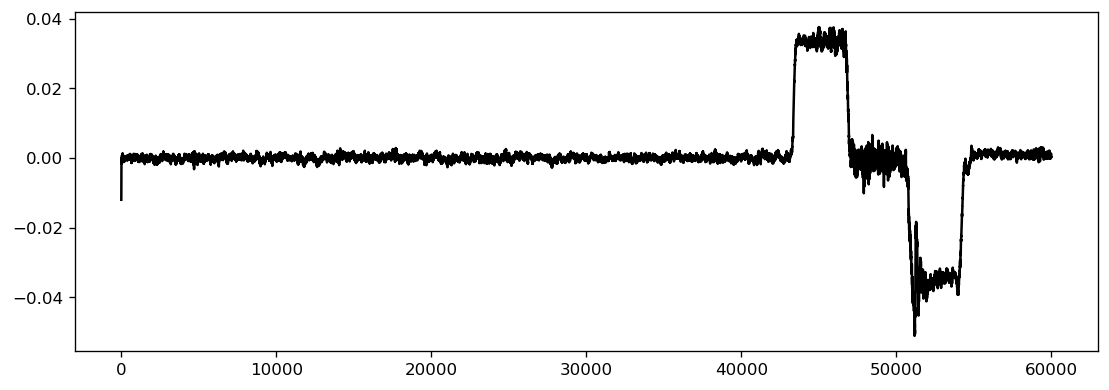

In [15]:
fig=plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
plt.plot(np.asarray(waveKalmaned[0]).flatten(), label = 'Smoothed Moved')
plt.show()

In [16]:
data = waveKalmaned[0]
wavelet = 'beta'
scales = 300
scalespace = 5

In [17]:
time = datetime.datetime.now()
test2 = cf.getThumbprint2(np.asarray(data).flatten(), wavelet)
print(datetime.datetime.now()-time)

0:00:04.064827


In [18]:
time = datetime.datetime.now()
test = cf.getThumbprint(np.asarray(data).flatten(), wavelet)
print(datetime.datetime.now() - time)

0:02:54.190168


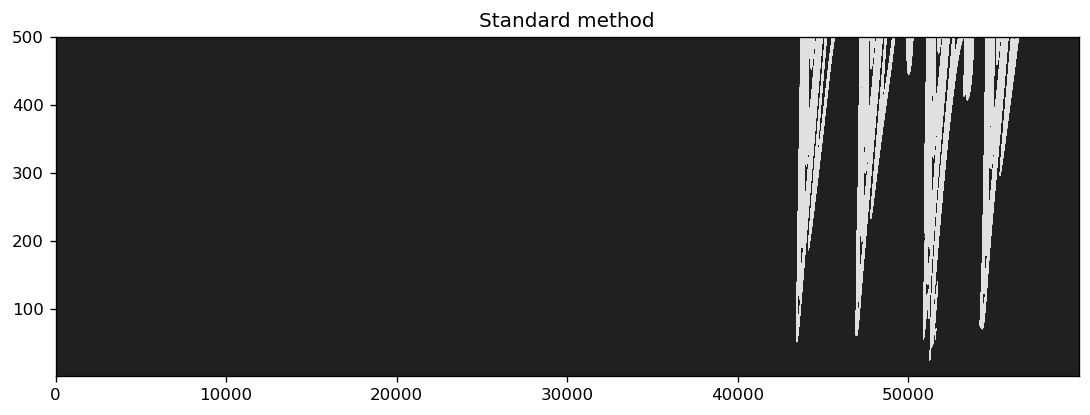

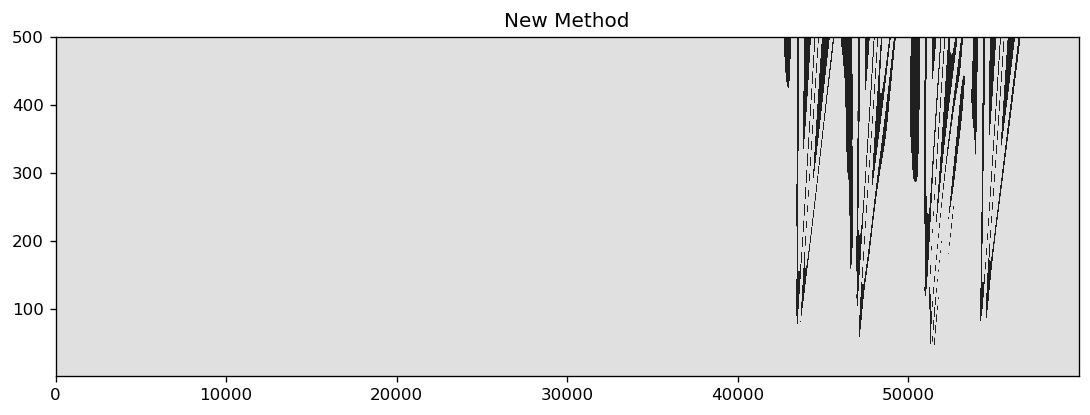

In [19]:
a = cf.PlotFingerPrint([test, 'Standard method'])
b = cf.PlotFingerPrint([test2, 'New Method'])

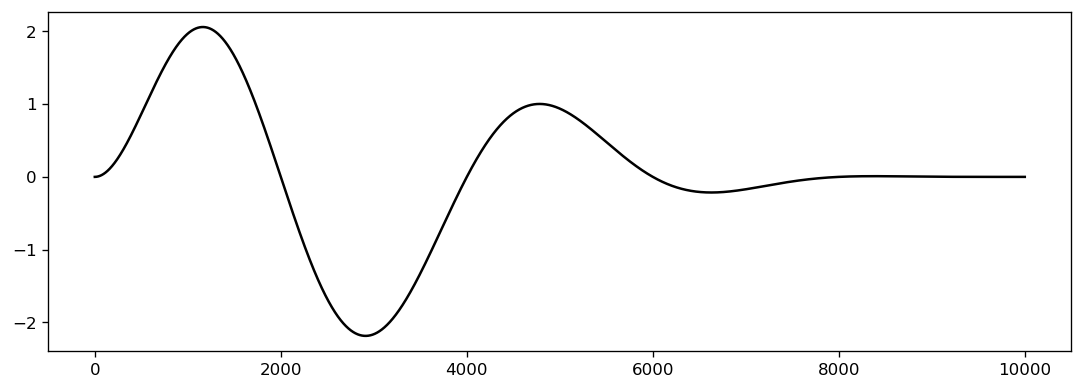

In [20]:
fig=plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
y = cf.BetaWavelet(10000, 2,  5, 5, 0)[0]
plt.plot(y, label = 'Beta Wavelet')
plt.show()
#BetaWavelet(sizes, a = 2, b = 5, cycle = 4)

In [21]:
Ridge1 = cf.RidgeCount(test)
Ridge2 = cf.RidgeCount(test2)

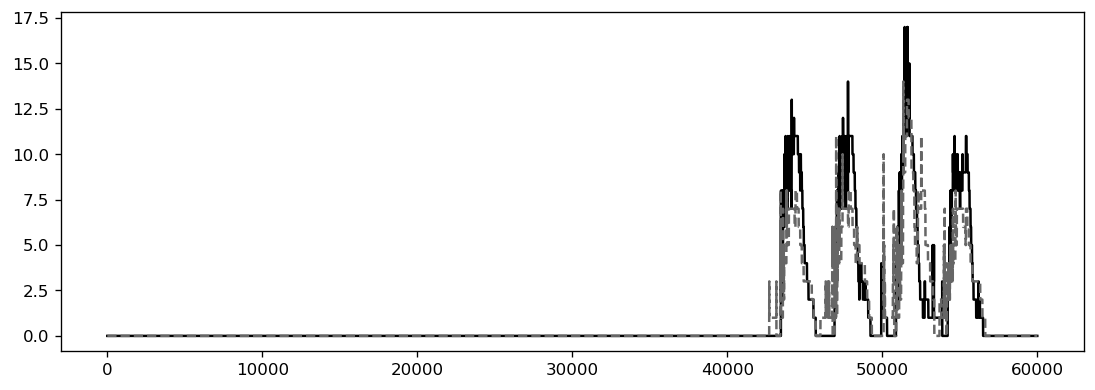

In [22]:
fig=plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
plt.plot(Ridge1, label = 'Beta Wavelet Derived Ridgecount method 1')
plt.plot(Ridge2, label = 'Beta Wavelet Derived Ridgecount method 2')
plt.show()